# Koneoppimista luottokorttipetoksista
##### https://www.kaggle.com/mlg-ulb/creditcardfraud/data


In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
66536,52098.0,1.001947,-0.759447,1.050660,0.066437,-1.192105,0.319201,-0.894573,0.404323,1.067286,...,-0.017589,-0.088873,0.038597,0.065420,-0.069704,1.000660,-0.044623,0.010891,74.95,0
120908,76004.0,1.073435,-1.508215,-0.088486,-1.358918,-1.208043,-0.385106,-0.475727,-0.113497,-2.420451,...,-0.369064,-1.180851,0.055885,-0.033066,0.059881,-0.540448,-0.014288,0.040178,209.93,0
29184,35354.0,-1.341518,-0.255481,1.365548,-1.751167,-0.624744,-0.415514,-0.481834,0.487639,-1.140567,...,0.508581,1.066478,-0.175799,-0.404327,0.329920,-0.139747,0.209508,0.023928,89.00,0
79004,57813.0,-0.456634,1.016242,2.096808,2.141616,0.097138,0.231290,0.600961,0.171742,-0.923367,...,-0.148875,-0.359753,0.065815,0.380840,-0.155362,-0.212740,0.044807,0.035149,27.38,0
21241,31551.0,-2.902210,-2.293901,1.942087,-1.007705,-1.422057,0.099566,0.642484,-0.336046,-0.069850,...,-0.255122,0.268078,-0.407542,0.629269,0.382677,-0.376269,-0.037148,0.405582,443.33,0
277272,167562.0,-0.114284,0.804893,-0.379551,-0.446348,0.890145,-0.495331,0.693655,0.018083,0.175442,...,-0.034421,-0.007363,0.061358,0.632671,-1.084184,-0.255426,0.112663,0.283171,10.00,0
256867,157899.0,-8.014823,7.062555,-6.600544,-1.569618,-1.968233,-1.305802,-1.912547,3.558874,1.541538,...,0.186234,0.106918,0.390380,0.112048,0.849316,0.566270,-0.263478,0.747257,2.55,0
243662,152019.0,1.974844,-0.682509,-1.717602,-0.796634,1.744523,3.772156,-1.158454,1.025987,0.932564,...,-0.214789,-0.633729,0.456401,0.697101,-0.602469,0.293630,-0.016351,-0.048141,14.00,0
215855,140246.0,-0.612773,1.124979,0.007175,-0.158674,0.187042,-0.403200,0.373862,0.440949,-0.480083,...,-0.143492,-0.446737,0.031498,-0.412554,-0.770226,0.310751,0.127053,0.146946,5.16,0
92686,64047.0,1.115468,-0.032641,0.604252,1.726820,-0.382511,0.160649,-0.209581,0.014265,-2.317467,...,-0.216533,-0.236356,0.009214,0.220131,0.349111,0.028202,0.019873,0.023845,54.20,0


#### Datan pitäisi olla tuotu onnistuneesti

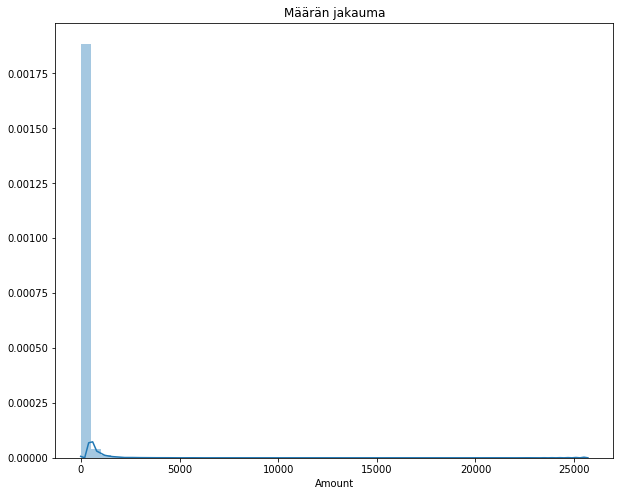

In [4]:
plt.figure(figsize=(10,8))
plt.title('Määrän jakauma')
sns.distplot(df.Amount)

#### Lasketaan petosten ja laillisten ostojen määrät

In [5]:
counts = df.Class.value_counts()
frauds = counts[1]
legit = counts[0]

In [6]:
"{} ({:.3f}%) petosta ja {} ({:.3f}%) laillista ostoa.".format(frauds,frauds/(legit+frauds)*100,legit,legit/(legit+frauds)*100)

'492 (0.173%) petosta ja 284315 (99.827%) laillista ostoa.'

Text(0.5, 0, "{0: 'Laillinen', 1: 'Petos'}")

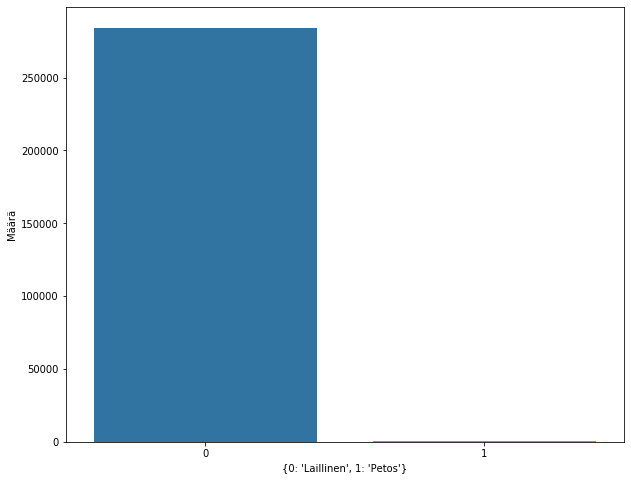

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index,y=counts)
plt.ylabel('Määrä')
plt.xlabel({0:'Laillinen',1:'Petos'})

In [8]:
corr = df.corr()

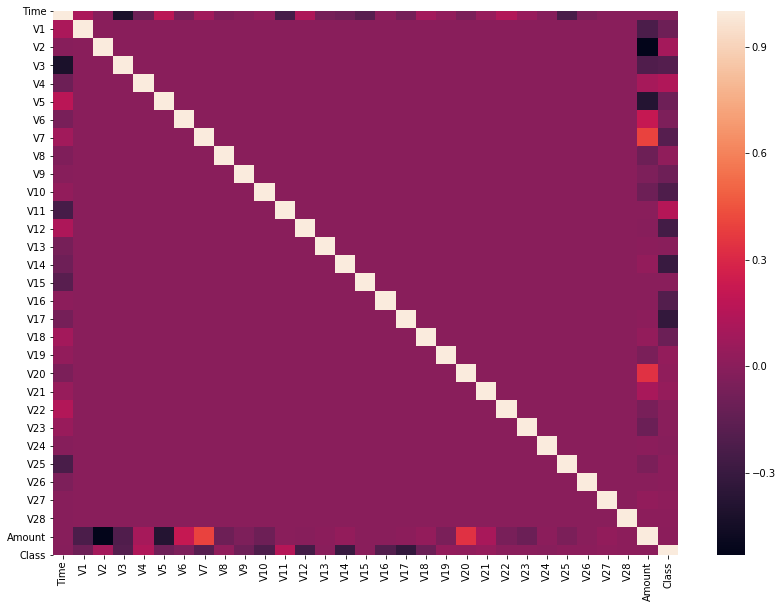

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(corr)

#### Koska yli 99% maksuista ei ole petoksia ja tarkoituksena on luoda petoksia ennustava malli, pitää datasta luoda tasopainoitettu versio josta malli koulutetaan

##### Datassa ei myöskään ole skaalattu määrä ja aika muuttujia, joten se pitää tehdä ennen datan varsinaista valmistelua

In [10]:
#Aika skaalaus
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [11]:
#Määrä skaalaus
scaled_amount = scaler.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

#### Yhdistetään uudet arvot ja pudotetaan vanhat

In [12]:
df = pd.concat([df,scaled_time.rename('scaled_time'), scaled_amount.rename('scaled_amount')],axis=1)

In [13]:
df.sample(10)
#Skaalatut arvot löytyvät taulukon päädystä

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amount
217096,140759.0,2.052795,-0.044023,-3.861083,-0.537986,3.123352,2.749487,0.152674,0.548438,-0.032329,...,-0.029343,0.683756,0.404868,0.732484,-0.084226,-0.061707,24.65,0,0.967509,-0.254677
60196,49203.0,-0.688199,1.046064,1.137037,1.157169,0.462428,0.205796,0.422894,0.195379,0.056671,...,-0.229672,-0.432950,-0.002562,-0.183629,0.548134,0.256469,1.00,0,-0.960470,-0.349231
267108,162614.0,1.502643,-1.512033,-0.220589,-0.548006,-1.452265,-0.408273,-0.683970,0.035563,1.536708,...,0.094405,0.144122,-0.706663,0.483236,-0.060933,-0.008510,246.89,0,1.427730,0.633858
266788,162484.0,2.057906,0.063727,-1.895105,0.193573,0.683765,-0.283143,0.061360,-0.045692,0.303868,...,0.266626,-0.009825,-0.233300,0.184622,-0.069539,-0.045332,5.99,0,1.424993,-0.329281
201440,133887.0,-0.504251,-0.524773,0.206342,-3.679026,1.577266,4.019301,-0.641582,1.103475,-0.423541,...,0.065467,0.696199,-0.581955,-0.508039,0.097780,0.152454,63.82,0,0.822799,-0.098072
126393,77998.0,-0.519421,0.916520,1.194065,0.916317,0.210500,-0.813263,0.897505,-0.165100,-0.658190,...,-0.022334,0.408599,-0.140150,-0.321136,0.398942,0.234513,54.81,0,-0.354107,-0.134094
81443,58931.0,-0.971650,0.790213,1.616566,0.014234,0.545193,-0.517151,0.919732,0.048983,-0.569803,...,-0.030202,0.040956,0.588161,-0.604094,0.204613,0.047442,54.47,0,-0.755619,-0.135454
145821,87212.0,-0.751005,0.947364,1.741412,0.860018,0.177906,-0.085503,0.595857,0.114505,-0.245280,...,-0.360762,-0.205610,0.651341,-0.337137,0.332691,0.138178,29.00,0,-0.160079,-0.237285
153789,100091.0,2.048192,0.038019,-0.894533,0.234461,0.215214,-0.533120,-0.063287,-0.306950,1.645810,...,0.531739,0.394082,-0.650849,-0.041177,-0.095312,-0.044624,22.94,0,0.111126,-0.261513
192446,129696.0,2.012953,-0.046077,-0.791219,0.303813,-0.394603,-0.920728,-0.377496,-0.138524,1.185685,...,0.347921,-0.223123,-0.455669,-0.277996,0.029752,-0.009965,0.77,0,0.734545,-0.350151


In [14]:
df.drop(['Time','Amount'],axis=1,inplace=True)

#### Data voidaan nyt valmistella "koulutus muotoon"

In [16]:
#Käytetään numpyn random.rand funktiota
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256387, 31)
Test Shape: (28420, 31)


In [26]:
#resetoidaan indeksit*
test.reset_index(drop=True,inplace=True)
train.reset_index(drop=True,inplace=True)

###### Lasketaan kuinka monta petosta train-datasta löytyy jotta tiedämme kuinka monta laillista ostoa tarvitsemme vertailukohteeksi

In [27]:
n_frauds_train = train.Class.value_counts()[1]

In [30]:
"{} petosta train datassa".format(n_frauds_train)

'438 petosta train datassa'

##### Valitaan sama määrä laillisia

In [33]:
non_fraud = train[train['Class']==0]
fraud = train[train['Class']==1]

In [36]:
select = non_fraud.sample(n_frauds_train)
select.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
79732,1.008779,-1.817872,0.114708,-1.116645,-1.809132,-0.903014,-0.576402,-0.299606,-1.831460,1.324969,...,-0.397259,-0.203202,0.324619,0.287947,-0.230778,-0.022296,0.066304,0,-0.687391,0.766195
133825,-0.088757,0.963122,0.077419,-0.321524,0.896637,-1.114855,1.420216,-0.603058,-0.964805,-0.041229,...,0.050737,-0.220945,-0.087105,0.039264,-0.607030,0.146403,0.169643,0,-0.100170,-0.253277
114294,0.386191,-1.064095,0.141806,1.782100,-0.904840,0.010843,0.094873,0.087738,0.590945,-0.675136,...,-0.104074,-0.472310,0.268765,0.493337,-0.332095,-0.006117,0.106269,0,-0.351243,1.192151
243487,-1.578580,1.272786,-1.403839,-0.522360,0.319169,0.253015,0.284136,-0.347670,-0.012780,-0.809854,...,0.144403,-0.289709,0.178252,-0.120776,0.479376,-0.771836,-0.290480,0,1.459633,0.061572
205725,1.971332,-0.415212,-0.616643,0.324346,-0.323128,-0.075174,-0.532906,-0.028204,1.271415,-0.168374,...,0.983376,0.039961,0.528476,0.043886,-0.161720,0.031719,-0.028706,0,1.069030,-0.220453


In [39]:
#resetoidaan indeksit selkeyden tähden
select.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

#### Nyt saamme tasapainoisen oppimisdatan

In [54]:
sub_sample = pd.concat([select,fraud])
len(sub_sample)

876

In [55]:
sub_sample = sub_sample.sample(frac=1).reset_index(drop=True)

In [56]:
sub_sample.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,1,-0.879860,-0.350191
1,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,1,-1.633966,-0.338077
2,-2.478767,0.501684,1.781056,-0.053737,-1.346205,0.266269,-0.258751,0.189826,0.127467,2.305576,...,0.133392,-0.392168,-0.165772,0.470969,-0.101519,0.419575,0.304542,0,-0.860613,0.046579
3,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,-14.226698,...,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,1,-1.124848,0.738288
4,-1.145652,-1.008929,0.883214,-2.128467,-0.691170,1.686101,-0.813290,0.959405,-2.621254,0.595058,...,0.297164,0.039693,-1.668291,0.262034,0.237691,-0.040286,-0.067617,0,1.076568,0.246484
5,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,1.197169,-1.678374,-3.538650,...,0.774745,0.059037,0.343200,-0.468938,-0.278338,0.625922,0.395573,1,-0.434948,-0.045617
6,-0.991607,1.543505,-0.973852,-0.232160,2.146390,3.940746,-1.297676,-1.330024,-1.212884,-0.868812,...,0.594418,0.050484,0.987862,-0.149913,-0.333827,0.018854,0.130864,0,-0.211419,-0.332919
7,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,-0.585778,...,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1,-0.995384,-0.350191
8,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,-0.815276,0.330123
9,-3.240187,2.978122,-4.162314,3.869124,-3.645256,-0.126271,-4.744730,-0.065331,-2.168366,-4.758304,...,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.421300,0.003146,1,-1.119605,0.335721


#### Data on nyt yhdistetty ja sekoitettu

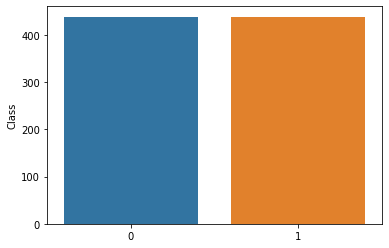

In [57]:
new_count = sub_sample.Class.value_counts()
sns.barplot(x=new_count.index,y=new_count)

In [61]:
subcorr = sub_sample.corr()
subcorr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
V1,1.000000,-0.823341,0.880664,-0.621165,0.859092,0.283194,0.893052,-0.001186,0.692116,0.769492,...,-0.063551,-0.073016,-0.022574,-0.029740,0.058375,0.218233,0.208423,-0.439428,0.218045,-0.011552
V2,-0.823341,1.000000,-0.867732,0.688787,-0.796540,-0.240003,-0.857067,-0.104447,-0.718928,-0.795755,...,0.008616,0.180150,-0.049473,0.083781,0.007611,-0.190893,0.011916,0.488633,-0.206969,-0.228300
V3,0.880664,-0.867732,1.000000,-0.780409,0.838065,0.430058,0.884970,-0.098675,0.779291,0.871587,...,-0.079791,-0.055045,0.071399,-0.051752,-0.007004,0.123455,0.136506,-0.573527,0.137100,0.005709
V4,-0.621165,0.688787,-0.780409,1.000000,-0.569800,-0.392793,-0.709767,0.069167,-0.788372,-0.788049,...,0.123868,0.019571,-0.128324,-0.019256,0.144312,-0.003895,-0.063425,0.708004,-0.196977,-0.015443
V5,0.859092,-0.796540,0.838065,-0.569800,1.000000,0.245775,0.828093,-0.135205,0.668312,0.763577,...,-0.127587,-0.129081,-0.117278,-0.050692,0.055563,0.212189,0.183670,-0.359225,0.276488,-0.109170
V6,0.283194,-0.240003,0.430058,-0.392793,0.245775,1.000000,0.241195,-0.578465,0.374997,0.397893,...,-0.007152,0.350809,-0.000383,-0.139077,-0.028405,-0.173410,-0.033807,-0.373559,0.127754,0.186427
V7,0.893052,-0.857067,0.884970,-0.709767,0.828093,0.241195,1.000000,0.160902,0.768933,0.871867,...,-0.123808,-0.109485,0.000493,0.073777,0.034831,0.253025,0.145170,-0.471324,0.199947,0.147766
V8,-0.001186,-0.104447,-0.098675,0.069167,-0.135205,-0.578465,0.160902,1.000000,-0.043042,-0.005115,...,0.067179,-0.437948,0.069233,0.211486,0.065199,0.299150,-0.018847,0.031402,-0.125535,0.023622
V9,0.692116,-0.718928,0.779291,-0.788372,0.668312,0.374997,0.768933,-0.043042,1.000000,0.850593,...,-0.254110,-0.065874,0.068238,-0.008065,-0.129323,0.142713,0.132463,-0.547969,0.152398,0.045125
V10,0.769492,-0.795755,0.871587,-0.788049,0.763577,0.397893,0.871867,-0.005115,0.850593,1.000000,...,-0.212452,-0.066364,0.050377,0.021201,-0.035022,0.156634,0.125695,-0.614634,0.205081,0.026031


#### Poistetaan korkeimmat ja pienimmät arvot datasta

In [72]:


Q1 = sub_sample.quantile(0.25)
Q3 = sub_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = sub_sample[~((sub_sample < (Q1 - 2.5 * IQR)) |(sub_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [74]:
len_after = len(df2)
len_before = len(sub_sample)
len_difference = len(sub_sample) - len(df2)
print('Vähensimme datan kokoa {} ostosta {} ostolla {} ostoon.'.format(len_before, len_difference, len_after))

Vähensimme datan kokoa 876 ostosta 259 ostolla 617 ostoon.


In [90]:
from sklearn.model_selection import train_test_split

X = df2.drop('Class', axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(493, 30)
(124, 30)
(493,)
(124,)


In [77]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [86]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest oppimismalli
model = RandomForestClassifier(n_estimators=10)

# Opetus
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:


# Mallin luotettavuuteen liittyvää statistiikkaa

from sklearn.metrics import mean_absolute_error

y_train_predict = model.predict(X_train)

mae = (mean_absolute_error(y_train, y_train_predict)) # keskimääräinen ennustevirhe

r2 = model.score(X_train, y_train) # selityskerroin

print('Mallin sopivuus opetusdataan')
print("--------------------------------------")
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = model.predict(X_test)
mae = (mean_absolute_error(y_test, y_test_predict))
r2 = model.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print('--------------------------------------')
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))



Mallin sopivuus opetusdataan
--------------------------------------
Keskimääräinen virhe: 0.004056795131845842
Selityskerroin: 0.9959432048681541


Mallin sopivuus testidataan
--------------------------------------
Keskimääräinen virhe: 0.08064516129032258
Selityskerroin: 0.9193548387096774
